In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost shap

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   - -------------------------------------- 4.2/124.9 MB 22.9 MB/s eta 0:00:06
   --- ------------------------------------ 9.4/124.9 MB 25.6 MB/s eta 0:00:05
   ---- ----------------------------------- 15.5/124.9 MB 26.3 MB/s eta 0:00:05
   ------ --------------------------------- 21.8/124.9 MB 27.0 MB/s eta 0:00:04
   -------- ------------------------------- 27.5/124.9 MB 26.9 MB/s eta 0:00:04
   ---------- ----------------------------- 33.3/124.9 MB 27.1 MB/s eta 0:00:04
   ------------ --------------------------- 39.1/124.9 MB 27.3 MB/s eta 0:00:04
   -------------- ------------------------- 44.3/124.9 MB 26.9 MB/s eta 0:00:04
   --------------- ------------------------ 49.5/124.9 MB 26.7 MB/s eta 0:00:03
   ----------------- ---------------------- 55.6/124.9 MB 27.0 MB/s eta 0:00:03
   ------------------- -------------------- 61.9/124.9 MB 27.4 MB/s eta 0:00:03
   --------------------- ------------------ 67.9/12

Step 1: Load dataset
Step 2: Data Cleaning & Exploration
Step 3: Feature Engineering
Step 4: Train ML Models (Logistic Regression, Random Forest, XGBoost)
Step 5: Model Evaluation (AUC-ROC, Precision-Recall, SHAP values)
Step 6: Save results & create visualizations

In [1]:
import os ### check directory

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from collections import Counter
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from scipy.stats import zscore


In [13]:
import os ### check directory
print(os.listdir("Data/"))

['.ipynb_checkpoints', 'cs-test.csv', 'cs-training.csv', 'Data Dictionary.xls', 'sampleEntry.csv']


In [5]:
import pandas as pd
df = pd.read_csv("Data/cs-training.csv",index_col=0)

# Display the first few rows
# print(df.head())


   SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
1                 1                              0.766127   45   
2                 0                              0.957151   40   
3                 0                              0.658180   38   
4                 0                              0.233810   30   
5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
1                                     2   0.802982         9120.0   
2                                     0   0.121876         2600.0   
3                                     1   0.085113         3042.0   
4                                     0   0.036050         3300.0   
5                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
1                               13                        0   
2                                4                        0   

In [183]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


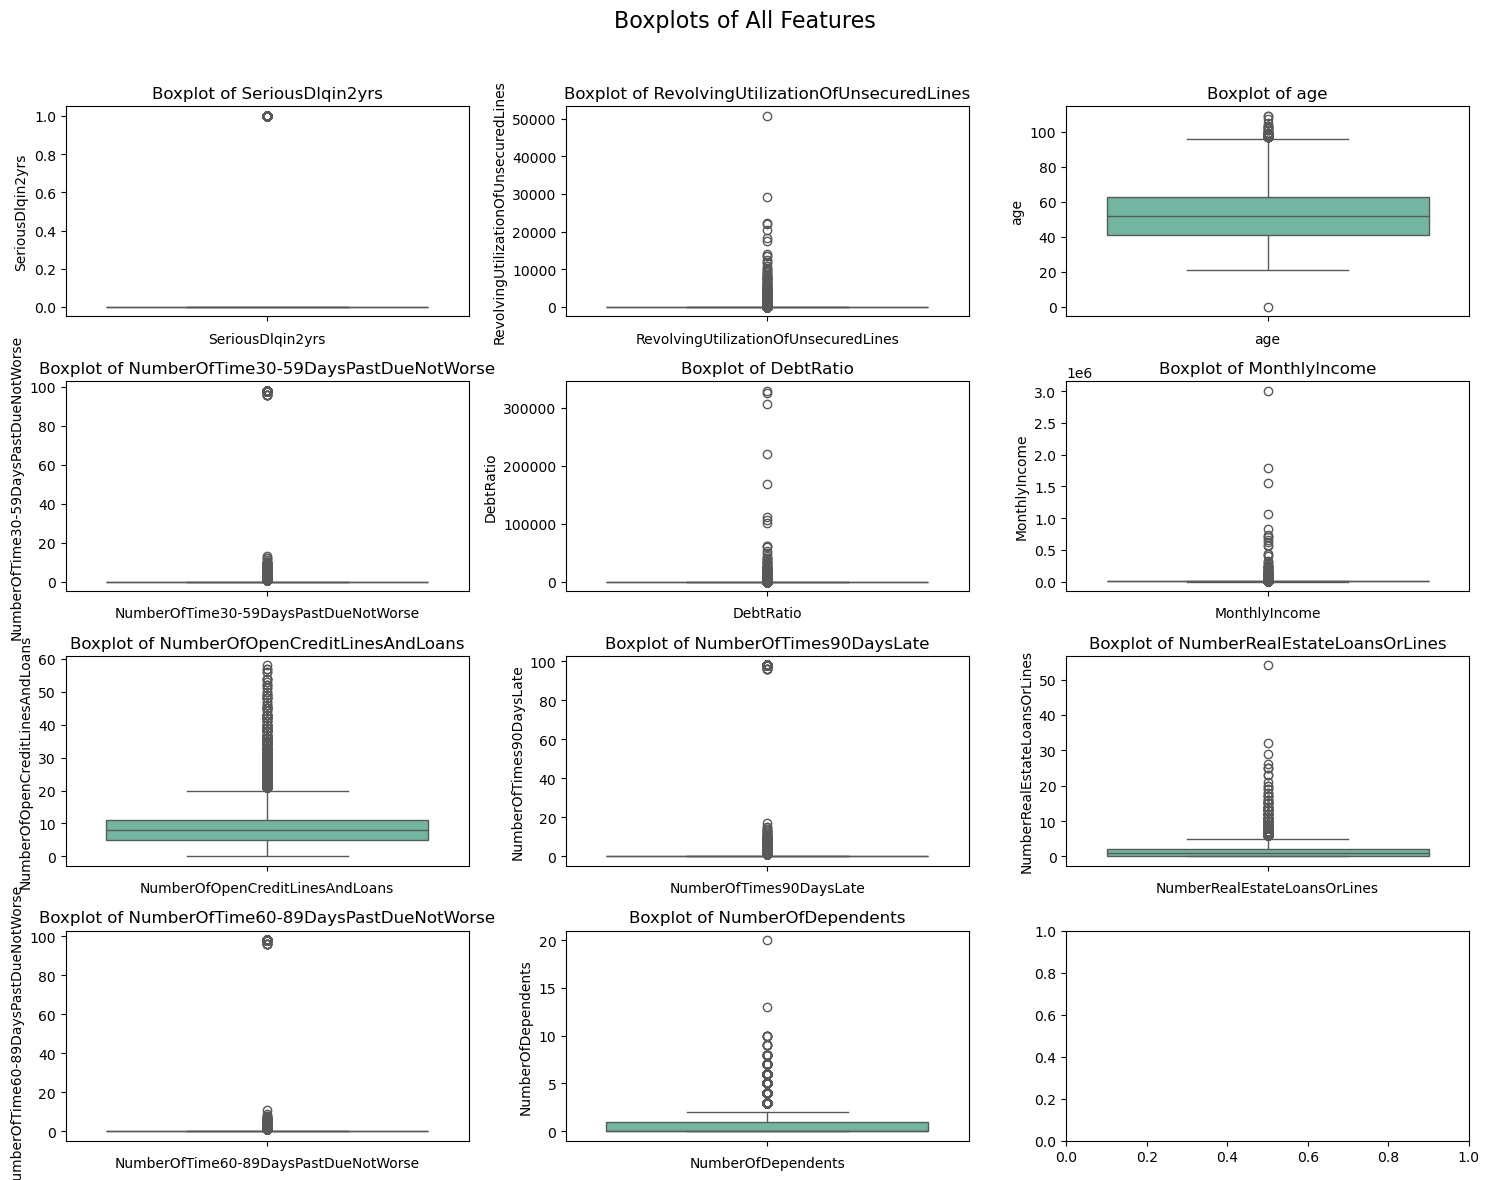

In [7]:
###data cleaning and fix if needed 
# df.dropna(inplace=True)  # OR use df.fillna()
# df.drop_duplicates(inplace=True) # Remove duplicate entries (if any)

####check outliers##########
# Create a 4x3 grid of boxplots
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
fig.suptitle("Boxplots of All Features", fontsize=16)

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.boxplot(data=df[column], ax=axes[i], palette="Set2")
    axes[i].set_title(f"Boxplot of {column}")
    axes[i].set_xlabel(column)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [185]:
from scipy.stats import zscore

z_scores = np.abs(df.apply(zscore))
outliers = (z_scores > 3).sum()
print("Number of outliers per column:")
print(outliers)

Number of outliers per column:
SeriousDlqin2yrs                        10026
RevolvingUtilizationOfUnsecuredLines      191
age                                        46
NumberOfTime30-59DaysPastDueNotWorse      270
DebtRatio                                 659
MonthlyIncome                               0
NumberOfOpenCreditLinesAndLoans          1898
NumberOfTimes90DaysLate                   278
NumberRealEstateLoansOrLines             1482
NumberOfTime60-89DaysPastDueNotWorse      269
NumberOfDependents                          0
dtype: int64


In [114]:
print(df.isnull().sum())

missing_percentage = df.isnull().sum()*100 / len(df)
print(round(missing_percentage,2))

total_missing = df.isnull().sum().sum()
print(total_missing)


Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64
Unnamed: 0                               0.00
SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           19.82
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoans

In [187]:
print(df.shape) ##row, column
print(df.size)
print(df.columns)
print(df.info())

(150000, 11)
1650000
Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120

Percentage of missing values: 19.82%


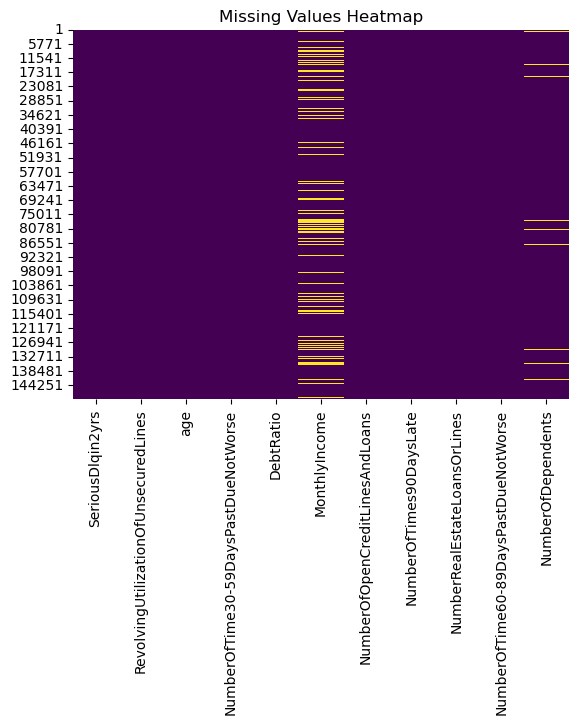

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check percentage of missing values
missing_percentage = df["MonthlyIncome"].isnull().mean() * 100
print(f"Percentage of missing values: {missing_percentage:.2f}%")

# Visualize missing values in dataset
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()





C:\Users\alpha\AppData\Local\Temp\ipykernel_17548\3307101695.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df["NumberOfDependents"], palette="Set2")


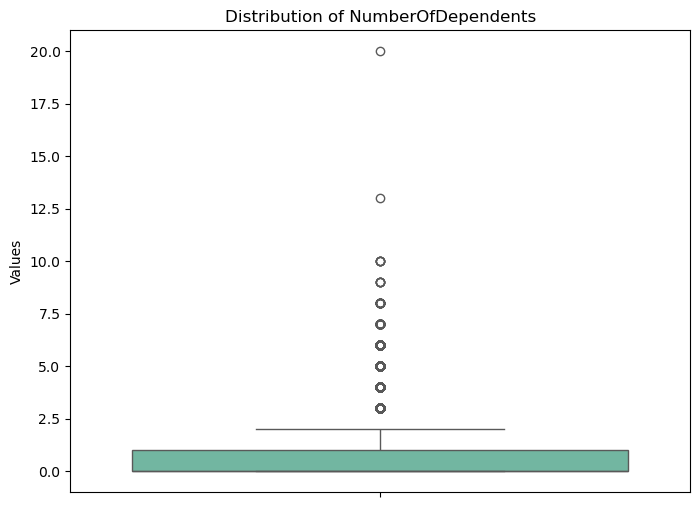

In [191]:
# Plot the distribution of dependent
plt.figure(figsize=(8, 6))
sns.boxplot(data=df["NumberOfDependents"], palette="Set2")
plt.title("Distribution of NumberOfDependents")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()


In [140]:
df['MonthlyIncome'].describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

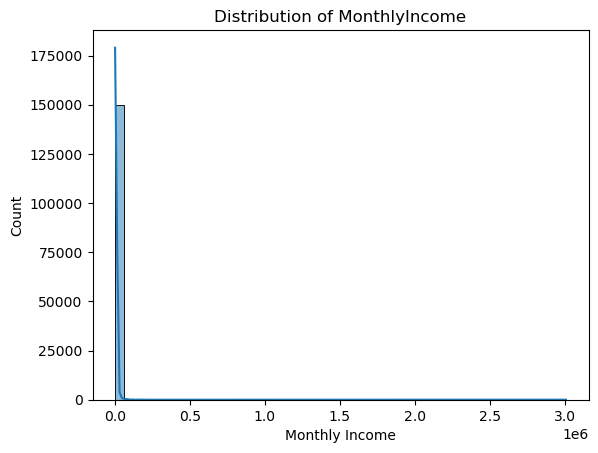

In [22]:
# Plot the distribution of MonthlyIncome (excluding NaNs)
sns.histplot(df["MonthlyIncome"], bins=50, kde=True)
plt.title("Distribution of MonthlyIncome")
plt.xlabel("Monthly Income")
plt.show()



In [112]:
print(df.corr())

                                      Unnamed: 0  SeriousDlqin2yrs  \
Unnamed: 0                              1.000000          0.002801   
SeriousDlqin2yrs                        0.002801          1.000000   
RevolvingUtilizationOfUnsecuredLines    0.002372         -0.001802   
age                                     0.004403         -0.115386   
NumberOfTime30-59DaysPastDueNotWorse   -0.000571          0.125587   
DebtRatio                              -0.002906         -0.007602   
MonthlyIncome                           0.002632         -0.019746   
NumberOfOpenCreditLinesAndLoans         0.004586         -0.029669   
NumberOfTimes90DaysLate                -0.001104          0.117175   
NumberRealEstateLoansOrLines           -0.000666         -0.007038   
NumberOfTime60-89DaysPastDueNotWorse   -0.000777          0.102261   
NumberOfDependents                     -0.000055          0.046048   

                                      RevolvingUtilizationOfUnsecuredLines  \
Unnamed: 0 

In [ ]:
############################################
# from sklearn.impute import KNNImputer

# imputer = KNNImputer(n_neighbors=5)
# df[['MonthlyIncome']] = imputer.fit_transform(df[['MonthlyIncome']])

In [142]:
import numpy as np
import pandas as pd
from statsmodels.imputation.mice import MICEData
from scipy.stats import chi2

def little_mcar_test(data):
    """
    Performs Little's MCAR test using an EM-based approach.
    Returns the chi-square statistic and p-value.
    """
    # Drop rows with all missing values (not needed for MCAR test)
    data = data.dropna(how="all")
    
    # Use MICE (Multiple Imputation) to estimate missing values
    mice_data = MICEData(data)
    complete_data = mice_data.data  # Imputed dataset
    
    # Compute mean and covariance matrices for observed and expected data
    observed_mean = data.mean()
    complete_mean = complete_data.mean()
    
    observed_cov = data.cov()
    complete_cov = complete_data.cov()
    
    # Compute test statistic
    n = data.shape[0]
    chi2_stat = n * (observed_mean - complete_mean).T @ np.linalg.inv(complete_cov) @ (observed_mean - complete_mean)
    
    # Compute degrees of freedom (df)
    df = data.isnull().sum().sum()  # Total number of missing values
    
    # Compute p-value
    p_value = 1 - chi2.cdf(chi2_stat, df)
    
    return chi2_stat, p_value


# Perform Little's MCAR test
chi2_stat, p_value = little_mcar_test(df)

# Display results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"p-value: {p_value}")


##Since the p-value is extremely high (≥ 0.05), we fail to reject the MCAR hypothesis.
### use median imputation is reasonable

Chi-Square Statistic: 5.344219445075196
p-value: 1.0


<Axes: >

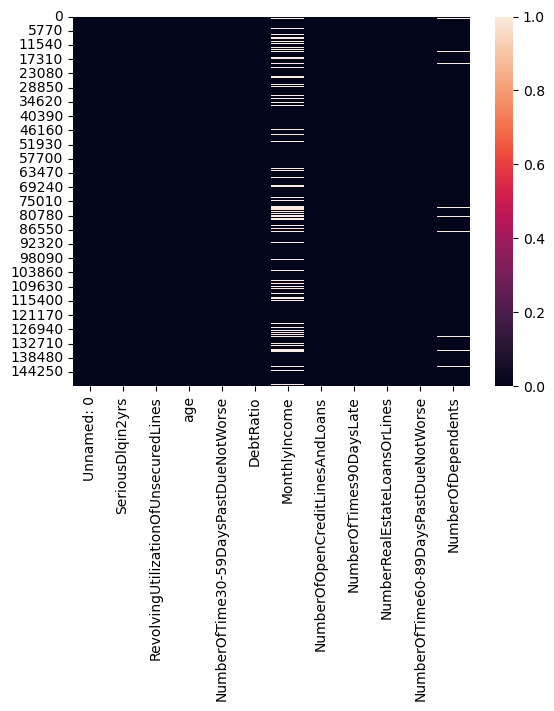

In [100]:
sns.heatmap(df.isnull())

In [85]:
print("Skewness:", df["MonthlyIncome"].skew())
print("Kurtosis:", df["MonthlyIncome"].kurtosis())

Skewness: 114.0403179452332
Kurtosis: 19504.705403466472


In [87]:
# Check correlation of MonthlyIncome with other features
correlation = df.corr()["MonthlyIncome"].sort_values(ascending=False)
print(correlation)


MonthlyIncome                           1.000000
NumberRealEstateLoansOrLines            0.124959
NumberOfOpenCreditLinesAndLoans         0.091455
NumberOfDependents                      0.062647
age                                     0.037717
RevolvingUtilizationOfUnsecuredLines    0.007124
Unnamed: 0                              0.002632
NumberOfTime30-59DaysPastDueNotWorse   -0.010217
NumberOfTime60-89DaysPastDueNotWorse   -0.011116
NumberOfTimes90DaysLate                -0.012743
SeriousDlqin2yrs                       -0.019746
DebtRatio                              -0.028712
Name: MonthlyIncome, dtype: float64


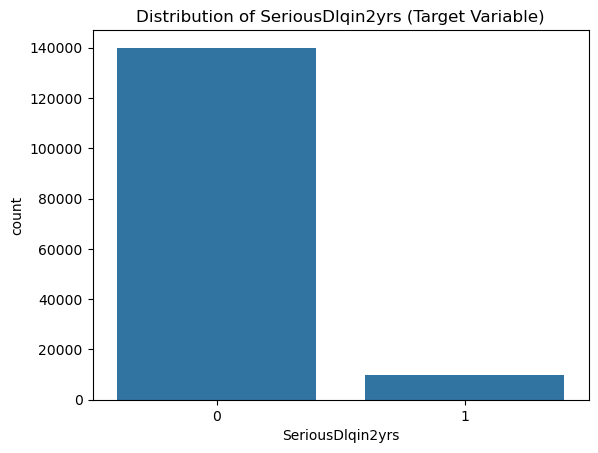

SeriousDlqin2yrs
0    0.93316
1    0.06684
Name: proportion, dtype: float64


In [63]:
# Verify the Target Variable
# import seaborn as sns
# import matplotlib.pyplot as plt
# Verify the Target Variable
# Countplot to check class distribution
sns.countplot(x=df["SeriousDlqin2yrs"])
plt.title("Distribution of SeriousDlqin2yrs (Target Variable)")
plt.show()

# Print value counts
print(df["SeriousDlqin2yrs"].value_counts(normalize=True))


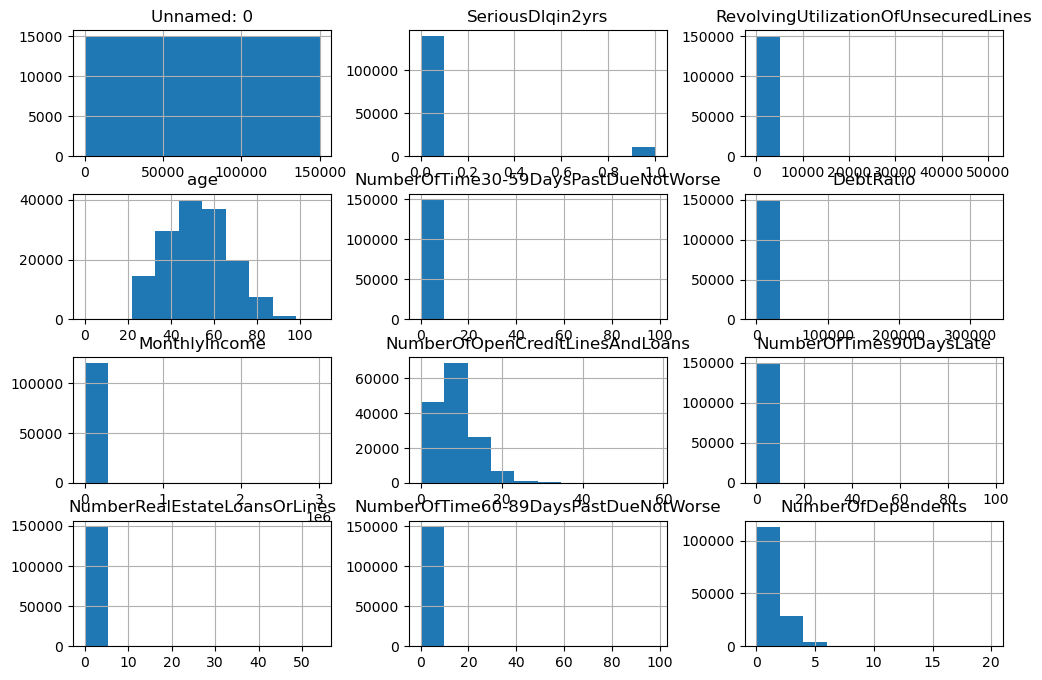

In [61]:
## EDA feature distributions, correlations, and patterns
df.hist(figsize=(12,8))
plt.show()


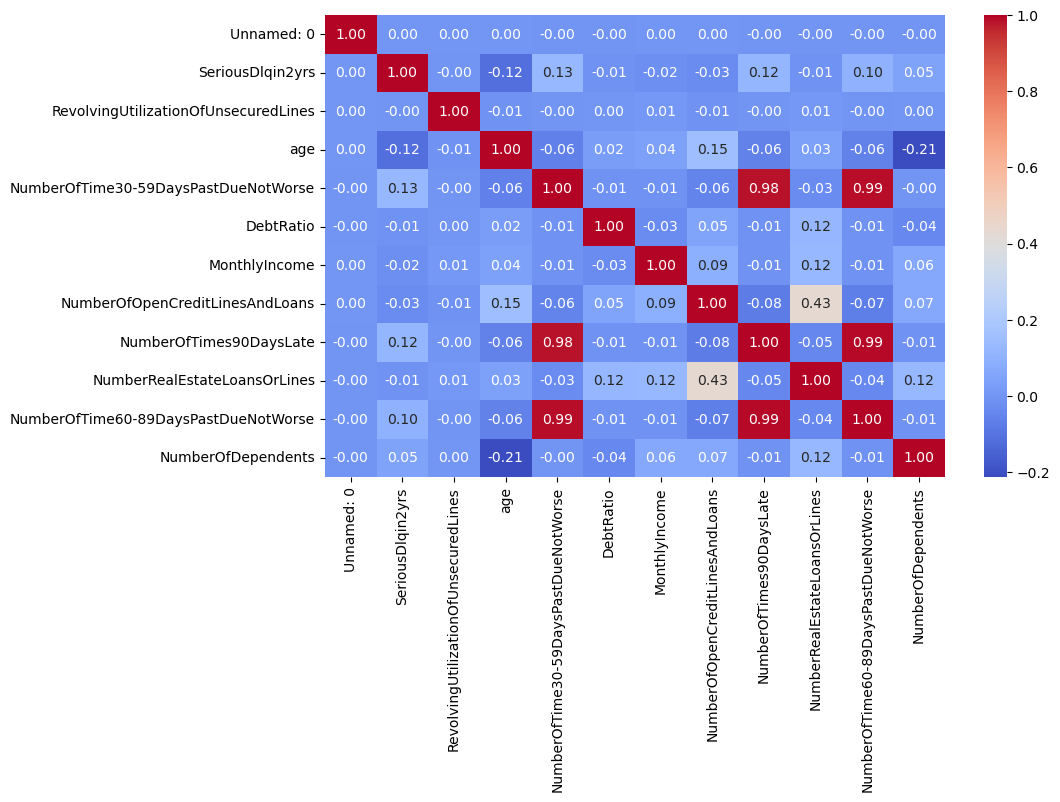

In [77]:
corr = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

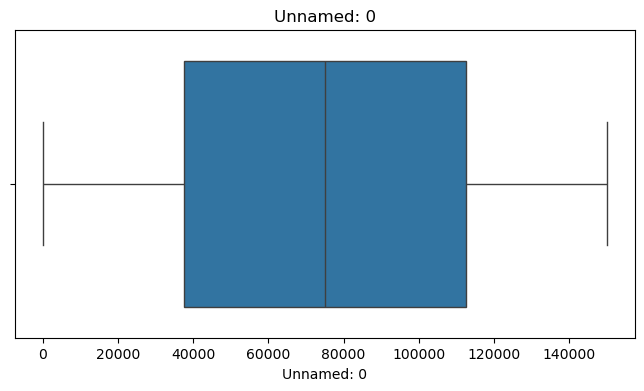

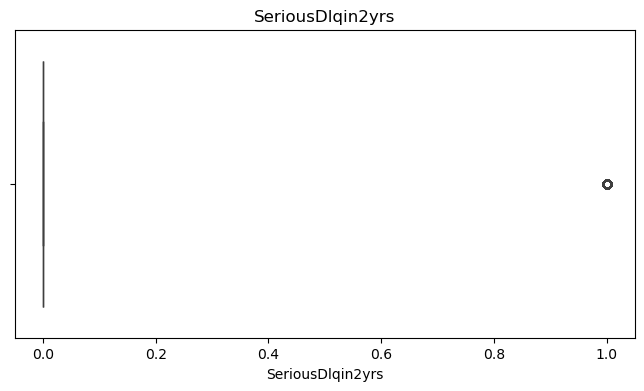

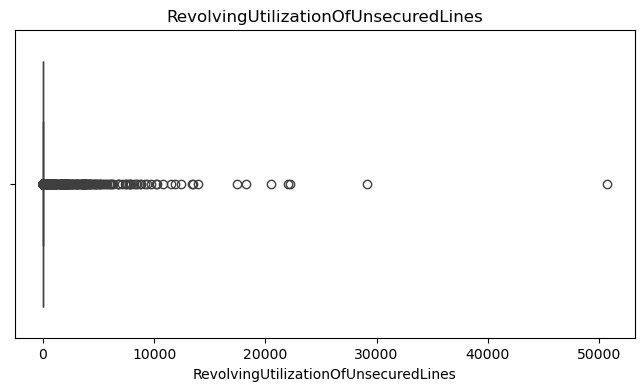

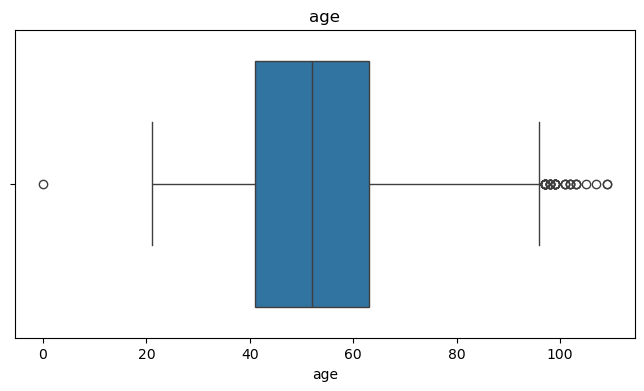

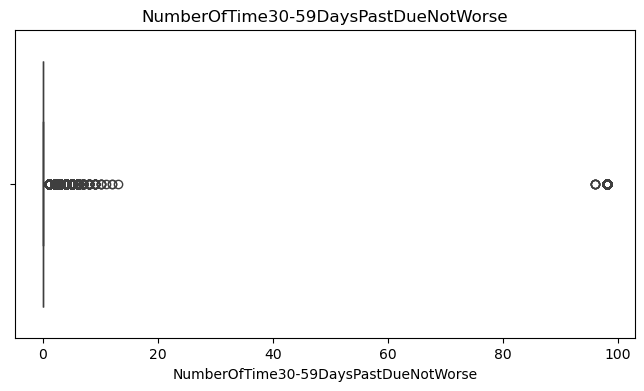

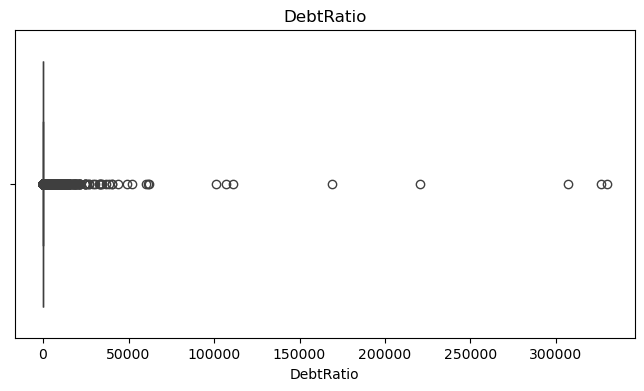

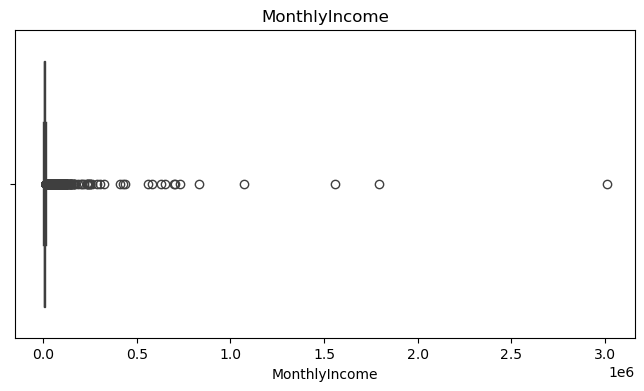

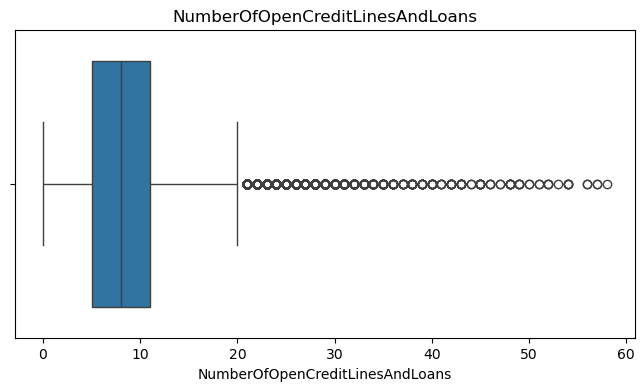

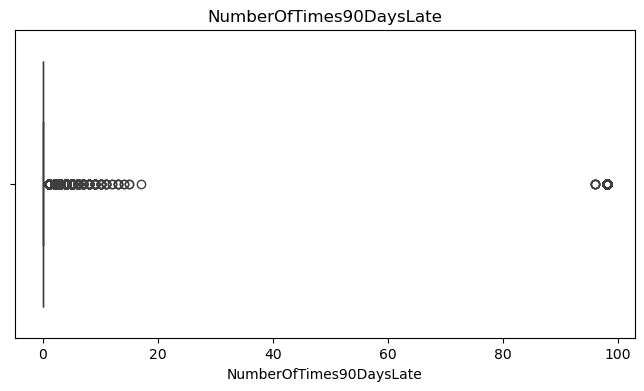

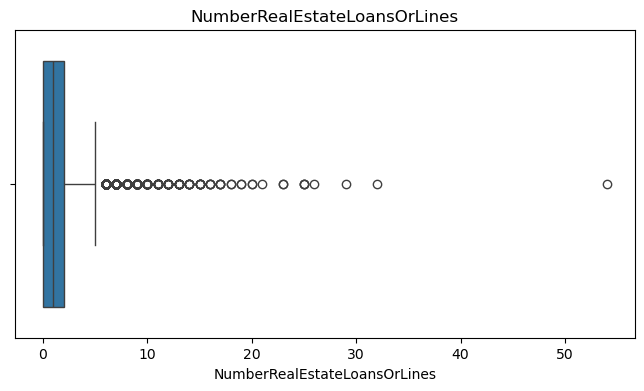

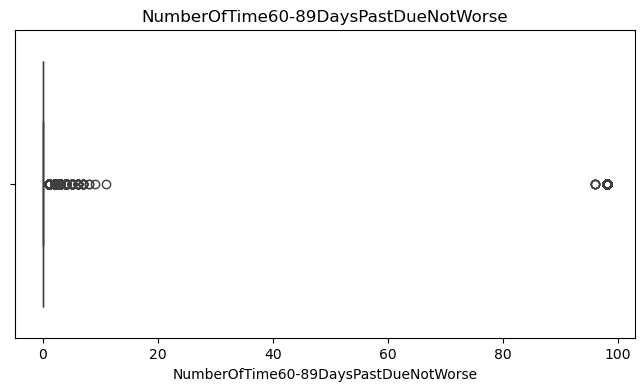

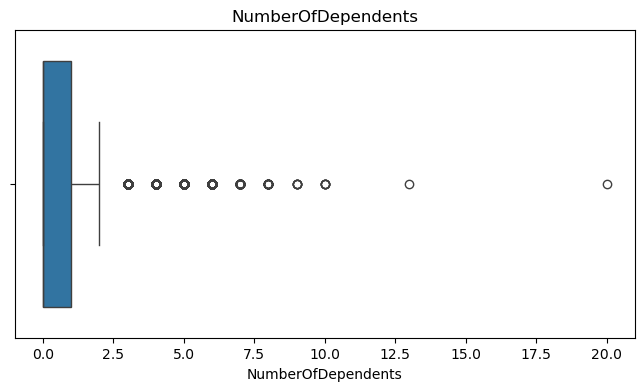

In [79]:
for column in df.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.show()


In [11]:


# X_train = df_train.drop(columns=["SeriousDlqin2yrs"])
X_train = df.drop(df.columns[[0]], axis=1) # 
# Define target variable
y_train = df["SeriousDlqin2yrs"]
print(X_train.columns)


Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')


In [13]:
#############fixmissing values######################################
df.loc[:, "MonthlyIncome"] = df["MonthlyIncome"].fillna(df["MonthlyIncome"].median())
df.loc[:, "NumberOfDependents"] = df["NumberOfDependents"].fillna(df["NumberOfDependents"].median())

print(df.isnull().sum())  # Check if MonthlyIncome has 0 missing values


SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64


In [15]:
print(df.columns)

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')


In [17]:
print(y_train.head())

1    1
2    0
3    0
4    0
5    0
Name: SeriousDlqin2yrs, dtype: int64


In [19]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Initialize SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # 50% minority class after resampling

# Apply SMOTE to training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("Original class distribution:", Counter(y_train))
print("Resampled class distribution:", Counter(y_train_resampled))




ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [225]:
testdf = pd.read_csv("Data/cs-test.csv", index_col=0)
X_test, y_test =testdf.drop(testdf.columns[[0]], axis=1),testdf["SeriousDlqin2yrs"]
print(X_test.columns)
print(y_test.head())
X_test.shape

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
Name: SeriousDlqin2yrs, dtype: float64


(101503, 10)

In [9]:
# Logistic Regression is a simple baseline, it’s a good first model to test.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Train Logistic Regression
log_reg = LogisticRegression(class_weight="balanced", random_state=42) # class_weight="balanced",
log_reg.fit(X_train_resampled, y_train)

###logistic does not work with NA, so lets remove....
# X_test_cleaned = X_test.dropna()
# y_test_cleaned = y_test.loc[X_test_cleaned.index]

for name, model in models.items():
    scores = cross_val_score(model, X_train_resampled, y_train, cv=5, scoring='roc_auc')
    print(f"{name}: Mean AUC-ROC = {np.mean(scores):.4f}, Std = {np.std(scores):.4f}")

NameError: name 'X_train_resampled' is not defined

In [241]:
print("Missing values in X_test:\n", X_test.isnull().sum())
from sklearn.impute import SimpleImputer
import pandas as pd

# Define imputer (choose "median" for skewed data, "mean" for normal distribution)
imputer = SimpleImputer(strategy="median")

# Fit on training data
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform test data using the same imputer
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

X_test_imputed.isnull().sum()

Missing values in X_test:
 RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           20103
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       2626
dtype: int64


RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [ ]:

# Predict on original test set
y_pred_log = log_reg.predict(X_test_imputed)

# Evaluate Performance
# print("Logistic Regression AUC-ROC:", roc_auc_score(y_test, y_pred_log))
# print("Classification Report:\n", classification_report(y_test, y_pred_log))

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42)
}

for name, model in models.items():
    scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='roc_auc')
    print(f"{name}: Mean AUC-ROC = {np.mean(scores):.4f}, Std = {np.std(scores):.4f}")


In [ ]:
## from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import numpy as np

# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(50,50), random_state=42)
}

# Evaluate models using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='roc_auc')
    print(f"{name}: Mean AUC-ROC = {np.mean(scores):.4f}, Std = {np.std(scores):.4f}")
